In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/jm1.csv')
X = data.iloc[:,0:]  #independent columns
y = data.iloc[:,-1]    #target column i.e RealBug
#get correlations of each features in dataset
import matplotlib.pyplot as plt
%matplotlib inline

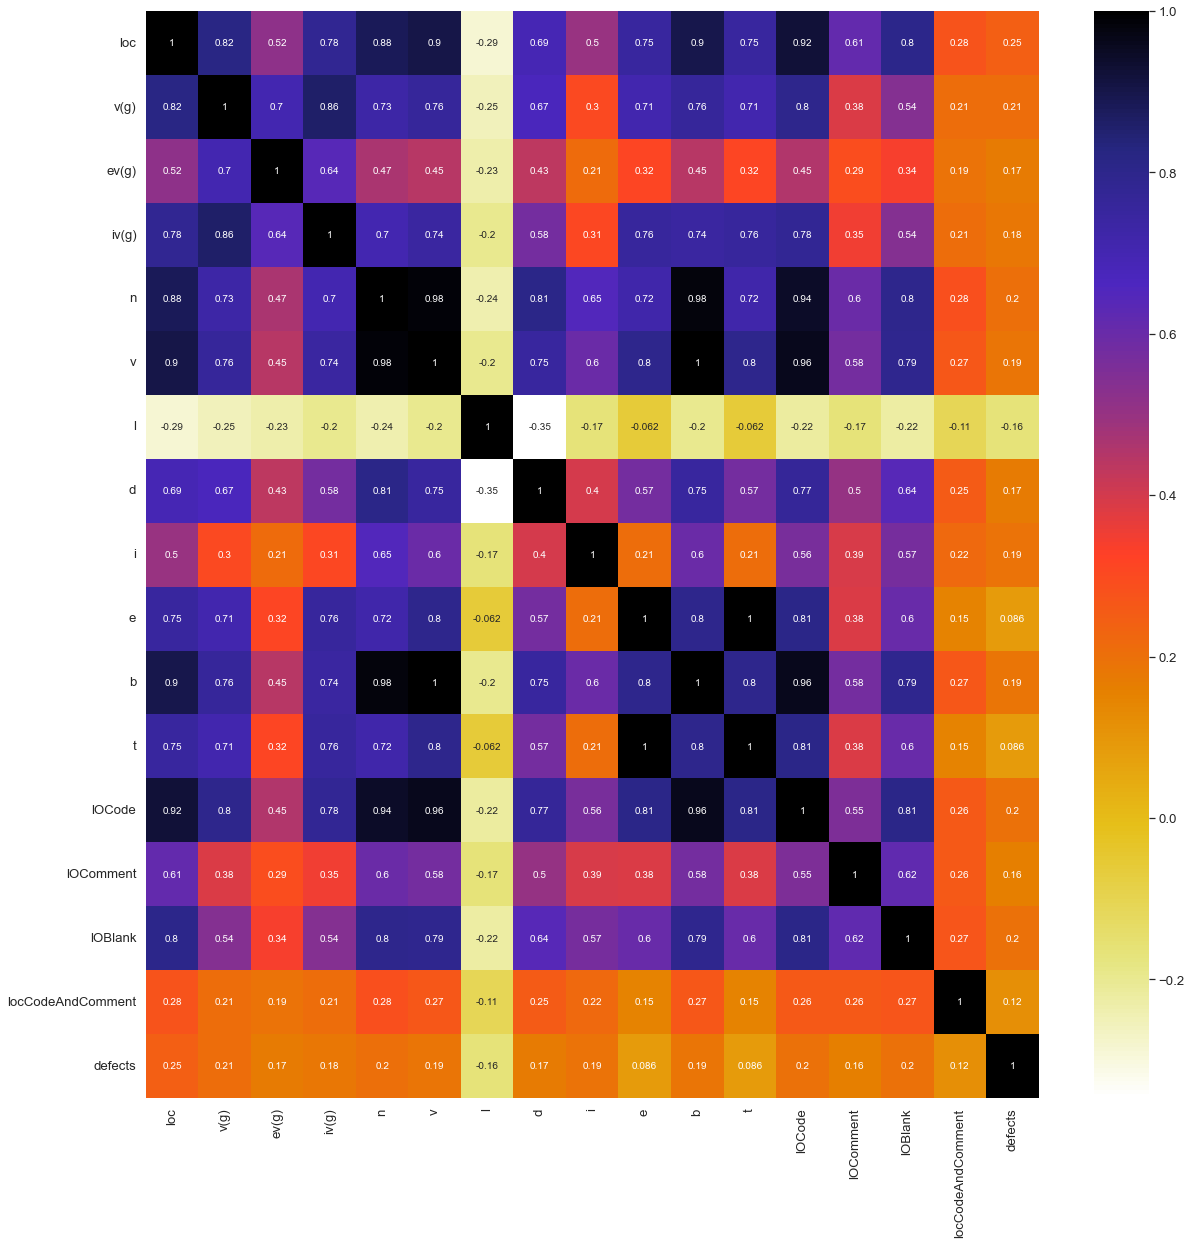

In [108]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [109]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    corr_list = {}
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
                corr_list[colname] = abs(corr_matrix.iloc[i, j])
    return col_corr, corr_list

In [110]:
corr_features, corr_list = correlation(data, 0.85)
len(set(corr_features))

6

In [111]:
import operator
sorted(corr_list.items(),key=operator.itemgetter(1),reverse=True)

[('t', 0.9999999999998054),
 ('b', 0.9996955665656879),
 ('v', 0.9842757777475507),
 ('lOCode', 0.9617793998439094),
 ('n', 0.8817947138672811),
 ('iv(g)', 0.859590295759068)]

In [112]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/jm1.csv")
imp_features = ['t', 'b', 'v', 'lOCode', 'n', 'defects']
data = data.loc[:, imp_features]

obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)

outcome = 'defects'
features = ['t', 'b', 'v', 'lOCode', 'n']

data[outcome] = pd.Categorical(data[outcome])
data[outcome] = data[outcome].cat.codes

X = data.iloc[:, :-1]
y = data.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



class_labels = ['Clean', 'Defective']
#class_labels = [0, 1]

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [113]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [114]:
y_test.value_counts()

0    2622
1     644
Name: defects, dtype: int64

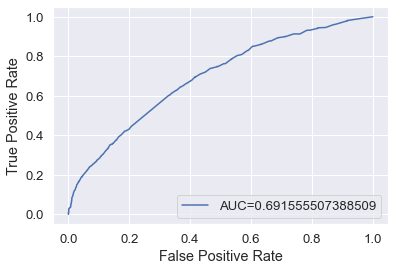

In [115]:
from sklearn import metrics
y_pred_proba = our_rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [16]:
X_test.index.values.tolist()

[3133,
 5785,
 7458,
 8952,
 10240,
 6948,
 6341,
 2753,
 10126,
 33,
 4634,
 8486,
 2855,
 3460,
 1408,
 3844,
 5382,
 1056,
 3837,
 3079,
 1608,
 1768,
 7965,
 2507,
 7963,
 7050,
 7360,
 3487,
 483,
 3704,
 8241,
 6828,
 3251,
 8542,
 3708,
 1662,
 10475,
 9392,
 8020,
 10734,
 8019,
 6795,
 5379,
 7077,
 1084,
 6741,
 7381,
 9464,
 1576,
 346,
 360,
 10083,
 7370,
 7601,
 9295,
 5900,
 3941,
 434,
 7796,
 6365,
 3689,
 5611,
 7278,
 6839,
 5756,
 9061,
 8146,
 5735,
 3746,
 4981,
 303,
 2254,
 304,
 6904,
 4121,
 6684,
 7542,
 1281,
 8489,
 5199,
 7951,
 10177,
 4667,
 9455,
 5053,
 5899,
 8546,
 3045,
 10252,
 5033,
 7423,
 1594,
 5186,
 1157,
 668,
 6730,
 6403,
 318,
 8943,
 694,
 10650,
 6728,
 9737,
 10814,
 8818,
 7739,
 3995,
 1284,
 251,
 1718,
 1953,
 1194,
 2138,
 3495,
 10480,
 35,
 1110,
 5936,
 7092,
 621,
 1432,
 3080,
 6739,
 5273,
 9344,
 5477,
 673,
 7288,
 5236,
 9114,
 2227,
 95,
 8773,
 4604,
 6772,
 9810,
 5292,
 4848,
 3777,
 895,
 795,
 5015,
 4161,
 5743,
 8

## LIME

In [116]:
# Import for LIME
import lime
import lime.lime_tabular

file_to_be_explained = 0
print(f'Explaining {file_to_be_explained} with LIME')

# LIME Step 1 - Construct an explainer


# LIME Step 2 - Use the constructed explainer with the predict function of your predictive model to explain any instance


# visualise the generated LIME explanation

Explaining 0 with LIME


In [117]:
# LIME Step 1 - Construct an explainer
our_lime_explainer = lime.lime_tabular.LimeTabularExplainer(
                            training_data = X_train.values,  
                            mode = 'classification',
                            training_labels = y_train,
                            feature_names = features,
                            class_names = class_labels,
                            discretize_continuous = True)
                            
# LIME Step 2 - Use the constructed explainer with the predict function 
# of your predictive model to explain any instance
lime_local_explanation_of_an_instance = our_lime_explainer.explain_instance(
                           # X_test[0],
                          # data_row = X_test.loc['FileName.py', : ], 
                            data_row = X_test.loc[file_to_be_explained, : ],
                            predict_fn = our_rf_model.predict_proba, 
                            num_features = 5,
                            top_labels = 1)

#explainer = lime_tabular.LimeTabularExplainer(X_train, mode = "regression", feature_names = boston_housing.feature_names)
#explanation = explainer.explain_instance(X_test[0], model.predict, num_features = len(boston_housing.feature_names))
                            
# Please use the code below to visualise the generated LIME explanation.
lime_local_explanation_of_an_instance.show_in_notebook()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


## SHAP

In [118]:
# Import libraries for SHAP
import subprocess
import sys
import importlib
import numpy
import shap

file_to_be_explained = 0
file_to_be_explained_idx = list(X_test.index).index(file_to_be_explained)

In [119]:
# explainer = shap.Explainer(our_rf_model, numpy.ascontiguousarray(X_train))
# shap_values = explainer(numpy.ascontiguousarray(X_test))

explainer = shap.Explainer(our_rf_model)
shap_values = explainer(X_test)

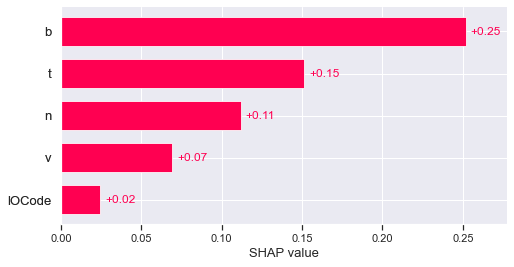

In [120]:
import matplotlib.pyplot as plt
shap.plots.bar(shap_values[file_to_be_explained_idx, :, 1], show=True)

## BreakDown

In [121]:
#necessary imports
from pyBreakDown.explainer import Explainer
from pyBreakDown.explanation import Explanation

In [122]:
#make explainer object
exp = Explainer(clf=our_rf_model, data= X_train, colnames=features)
#make explanation object that contains all information

explanation = exp.explain(observation=X_train.iloc[0,:].values,direction="up",useIntercept=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

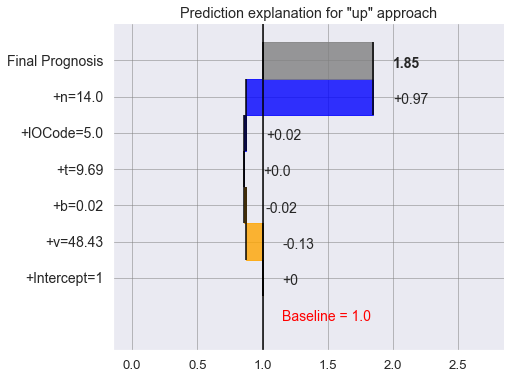

In [123]:
explanation.visualize()

## PyExplainer

In [124]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/jm1.csv")
imp_features = ['t', 'b', 'v', 'lOCode', 'n', 'defects']
data = data.loc[:, imp_features]

obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)

outcome = 'defects'
features = ['t', 'b', 'v', 'lOCode', 'n']

data[outcome] = pd.Categorical(data[outcome])
data[outcome] = data[outcome].cat.codes

X = data.iloc[:, :-1]
y = data.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def train_test_split(df, frac=0.2):
    
    # get random sample 
    test = df.sample(frac=frac, axis=0)

    # get everything but the test sample
    train = df.drop(index=test.index)

    return train, test

class_labels = ['Clean', 'Defective']
#class_labels = [0, 1]

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)



In [37]:
X_test

,t,b,v,lOCode,n
3133,22.03,0.03,92.51,12,25.0
5785,15.42,0.02,55.51,2,15.0
7458,57.95,0.05,144.43,4,34.0
8952,0.00,0.00,0.00,0,0.0
10240,638.79,0.18,531.36,31,102.0
...,...,...,...,...,...
5526,4.50,0.01,27.00,2,9.0
7416,3009.90,0.56,1667.66,60,279.0
7244,1050.03,0.26,787.52,25,149.0
8302,1795.78,0.34,1005.29,55,180.0


In [126]:
0 in X_test.index.values.tolist()

True

In [125]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [127]:
from pyexplainer.pyexplainer_pyexplainer import PyExplainer
file_to_be_explained = 0
import numpy as np
np.random.seed(0)

pyexp = PyExplainer(X_train = X_train,
                           y_train = y_train,
                           indep = X_train.columns,
                           dep = outcome,
                           top_k_rules=5,
                           blackbox_model = rf_model)

# PyExplainer Step 2 - Generate the rule-based explanation of an instance to be explained
exp_obj = pyexp.explain(X_explain = X_test.loc[file_to_be_explained,:].to_frame().transpose(),
                        y_explain = pd.Series(bool(y_test.loc[file_to_be_explained]), 
                                                      index = [file_to_be_explained],
                                                      name = outcome),
                        search_function = 'crossoverinterpolation',
                        max_iter=1000,
                        max_rules=20,
                        random_state=0,
                        reuse_local_model=True)

# Print rule 
exp_obj['top_k_positive_rules'][:1]

# Please use the code below to visualise the generated PyExplainer explanation (What-If interactive visualisation).
pyexp.visualise(exp_obj, title="Why this file is predicted as defect-introducing?")


Output(layout=Layout(border='3px solid black'))

FloatSlider(value=2.0, continuous_update=False, description='#1 The value of lOCode is more than 2.0', layout=…

## PDP

In [46]:
import numpy as np
import pandas as pd
# sklearn version: v1.0.1
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.inspection import (partial_dependence, 
                                PartialDependenceDisplay)
import matplotlib.pyplot as plt
import seaborn as sns


file_to_be_explained = 0

print(f'Explaining {file_to_be_explained} with PDP')



Explaining 0 with PDP


## Average Value of t

In [47]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [0], kind = 'average')

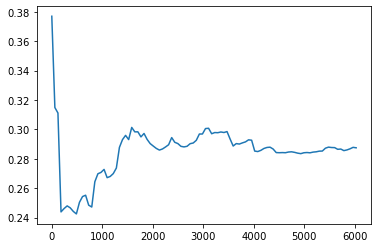

In [48]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of b

In [49]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [1], kind = 'average')

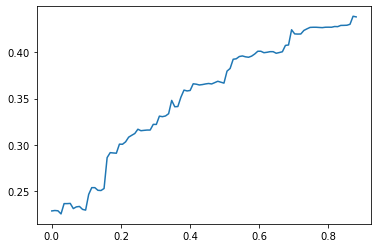

In [50]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of v

In [51]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [2], kind = 'average')

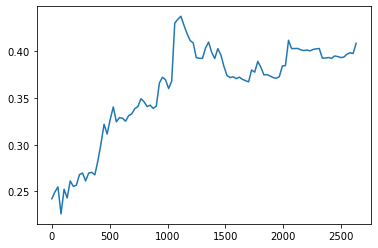

In [52]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of lOCode

In [53]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [3], kind = 'average')

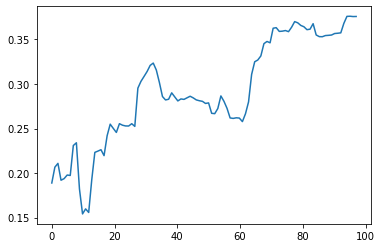

In [54]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of n

In [55]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [4], kind = 'average')

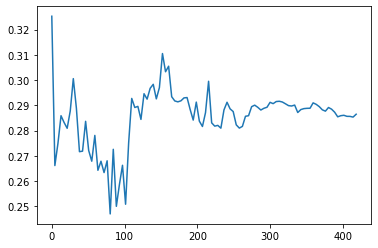

In [56]:
plt.plot(results['values'][0], results['average'][0])

## ICE

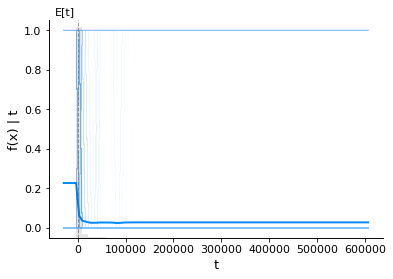

In [57]:
import subprocess
import sys
import importlib
import numpy
import shap

shap.plots.partial_dependence(
    "t", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

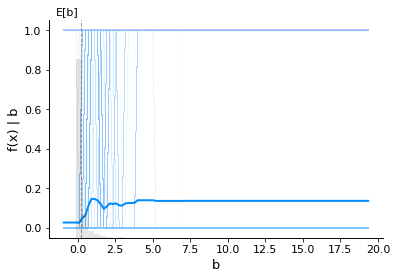

In [58]:
shap.plots.partial_dependence(
    "b", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

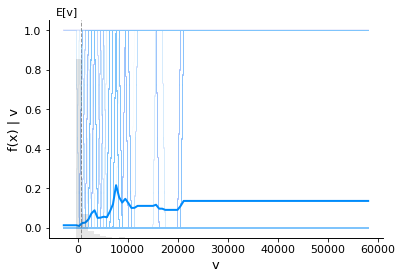

In [59]:
shap.plots.partial_dependence(
    "v", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

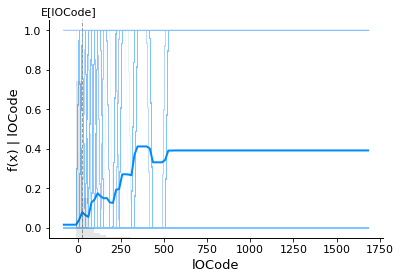

In [60]:
shap.plots.partial_dependence(
    "lOCode", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

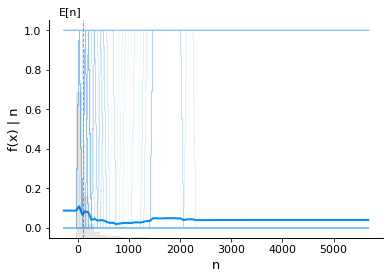

In [61]:
import subprocess
import sys
import importlib
import numpy
import shap

shap.plots.partial_dependence(
    "n", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

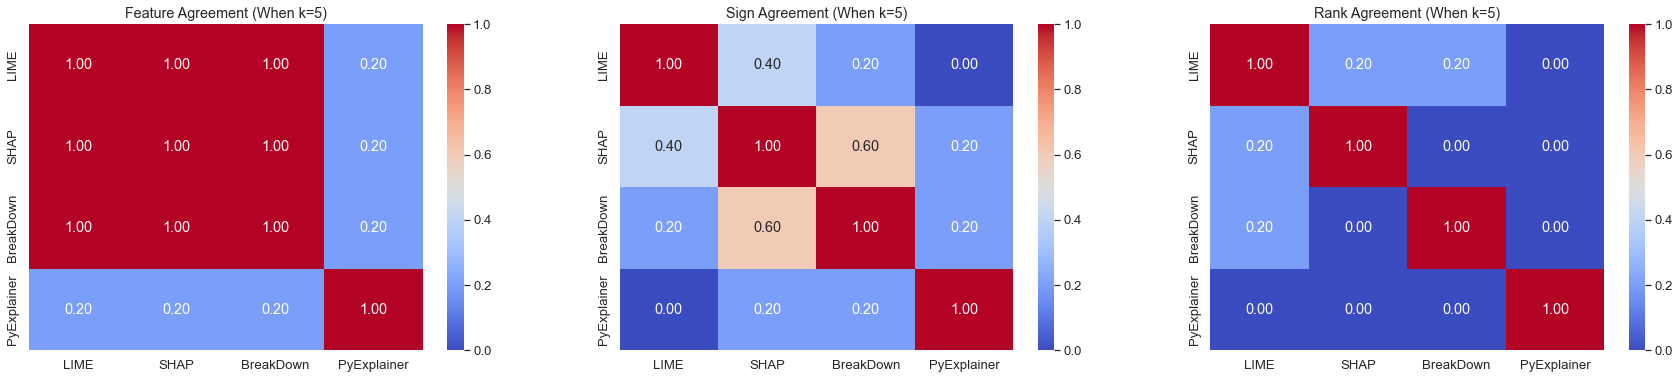

In [128]:
import seaborn as sns
import pandas as pd

data1 = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/Corr_Feature Agreement.csv", index_col=0)
data2 = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/Corr_Sign Agreement.csv", index_col=0)
data3 = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/Corr_Rank Agreement.csv", index_col=0)


fig, ax = plt.subplots(1,3, figsize=(30, 6))


sns.set(font_scale=1.2)
sns.heatmap(data1, cmap="coolwarm", annot=True, fmt=".2f", vmin=0, vmax=1, ax= ax[0])
ax[0].title.set_text("Feature Agreement (When k=5)")

sns.heatmap(data2, cmap="coolwarm", annot=True, fmt=".2f", vmin=0, vmax=1, ax= ax[1])
ax[1].title.set_text("Sign Agreement (When k=5)")

sns.heatmap(data3, cmap="coolwarm", annot=True, fmt=".2f", vmin=0, vmax=1, ax= ax[2])
ax[2].title.set_text("Rank Agreement (When k=5)")


plt.show()